## Description

The dataset comprises anonymized data on online sales transactions, capturing various aspects of product purchases, customer details, and order characteristics.This dataset can be utilized for analyzing sales trends, customer purchase behavior, and order management in e-commerce or retail.It can help in evaluating the effects of discounts and payment methods on sales, optimizing inventory by studying product demand, and improving customer satisfaction through better shipping and return handling.

Import Data Libraries



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


loading data from csv file
loaded first 10 rows using head function and last 10 rows using tail function.

In [3]:

df=pd.read_csv("c:\Data Science\Project\online_sales_dataset.csv")
print(df)
print(df.head(10))
print(df.tail(10))

       InvoiceNo StockCode   Description  Quantity  InvoiceDate  UnitPrice  \
0         221958  SKU_1964     White Mug        38     01-01-20       1.71   
1         771155  SKU_1241     White Mug        18  1/1/20 1:00      41.25   
2         231932  SKU_1501    Headphones        49  1/1/20 2:00      29.11   
3         465838  SKU_1760     Desk Lamp        14  1/1/20 3:00      76.68   
4         359178  SKU_1386     USB Cable       -30  1/1/20 4:00     -68.11   
...          ...       ...           ...       ...          ...        ...   
49777     354083  SKU_1562      Blue Pen        25  9/5/25 1:00      70.92   
49778     296698  SKU_1930     USB Cable         7  9/5/25 2:00      51.74   
49779     177622  SKU_1766  Office Chair        43  9/5/25 3:00      85.25   
49780     701213  SKU_1602      Notebook        48  9/5/25 4:00      39.64   
49781     772215  SKU_1832     White Mug        30  9/5/25 5:00      38.27   

       CustomerID         Country  Discount  PaymentMethod  Shi

Getting data information

In [4]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

checking how much null values are there in data set

In [5]:
print(df.isna().sum())
print(df.isna().sum().sum())

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64
10952


removing empty cells using dropna() function.For cchanging the original dataframe using the argurment invoice = true.

In [6]:
df.dropna(inplace=True)
print(df.head(10))

    InvoiceNo StockCode     Description  Quantity   InvoiceDate  UnitPrice  \
0      221958  SKU_1964       White Mug        38      01-01-20       1.71   
1      771155  SKU_1241       White Mug        18   1/1/20 1:00      41.25   
2      231932  SKU_1501      Headphones        49   1/1/20 2:00      29.11   
3      465838  SKU_1760       Desk Lamp        14   1/1/20 3:00      76.68   
5      744167  SKU_1006    Office Chair        47   1/1/20 5:00      70.16   
6      210268  SKU_1087       USB Cable        25   1/1/20 6:00      85.74   
7      832180  SKU_1597        Notebook         8   1/1/20 7:00      95.65   
8      154886  SKU_1907  Wireless Mouse        19   1/1/20 8:00      98.19   
9      237337  SKU_1866      Headphones        40   1/1/20 9:00      98.17   
10     621430  SKU_1144        Notebook        49  1/1/20 10:00      87.56   

    CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0      37039.0       Australia      0.47  Bank Transfer         10.7

find duplicates in dataset

In [7]:
print(df.duplicated().sum())

0


removing duplicates using drop_duplicates() method

In [16]:
df.drop_duplicates(inplace=True)
print(df.head(10))

    InvoiceNo     Description  Quantity         InvoiceDate  UnitPrice  \
0      221958       White Mug        38 2020-01-01 00:00:00       1.71   
1      771155       White Mug        18 2020-01-01 01:00:00      41.25   
2      231932      Headphones        49 2020-01-01 02:00:00      29.11   
3      465838       Desk Lamp        14 2020-01-01 03:00:00      76.68   
5      744167    Office Chair        47 2020-01-01 05:00:00      70.16   
6      210268       USB Cable        25 2020-01-01 06:00:00      85.74   
7      832180        Notebook         8 2020-01-01 07:00:00      95.65   
8      154886  Wireless Mouse        19 2020-01-01 08:00:00      98.19   
9      237337      Headphones        40 2020-01-01 09:00:00      98.17   
10     621430        Notebook        49 2020-01-01 10:00:00      87.56   

    CustomerID         Country  Discount  PaymentMethod  ShippingCost  \
0      37039.0       Australia      0.47  Bank Transfer         10.79   
1      19144.0           Spain      0.1

removing unwanted column

In [9]:
del df['StockCode']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44804 entries, 0 to 49781
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          44804 non-null  int64  
 1   Description        44804 non-null  object 
 2   Quantity           44804 non-null  int64  
 3   InvoiceDate        44804 non-null  object 
 4   UnitPrice          44804 non-null  float64
 5   CustomerID         44804 non-null  float64
 6   Country            44804 non-null  object 
 7   Discount           44804 non-null  float64
 8   PaymentMethod      44804 non-null  object 
 9   ShippingCost       44804 non-null  float64
 10  Category           44804 non-null  object 
 11  SalesChannel       44804 non-null  object 
 12  ReturnStatus       44804 non-null  object 
 13  ShipmentProvider   44804 non-null  object 
 14  WarehouseLocation  44804 non-null  object 
 15  OrderPriority      44804 non-null  object 
dtypes: float64(4), int64(2), ob

finding outlayers using boxplot in seaborn

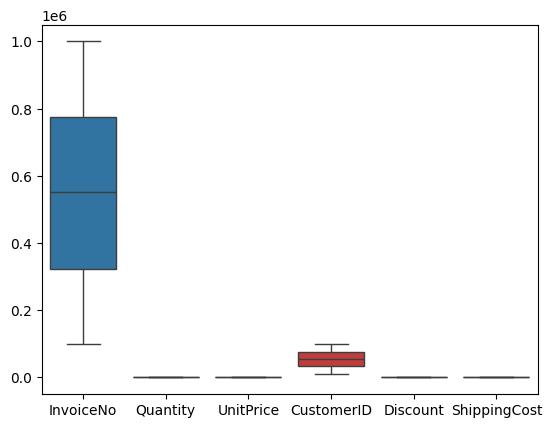

In [10]:
sns.boxplot(data=df)
plt.show()

changing some data types of columns from object to string

In [11]:
df['Description']=df['Description'].astype('string')
df['InvoiceDate']=df['InvoiceDate'].astype('datetime64[s]')
df['Country']=df['Country'].astype('string')
df['PaymentMethod']=df['PaymentMethod'].astype('string')
df['Category']=df['Category'].astype('string')
df['SalesChannel']=df['SalesChannel'].astype('string')
df['ReturnStatus']=df['ReturnStatus'].astype('string')
df['ShipmentProvider']=df['ShipmentProvider'].astype('string')
df['WarehouseLocation']=df['WarehouseLocation'].astype('string')
df['OrderPriority']=df['OrderPriority'].astype('string')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44804 entries, 0 to 49781
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype        
---  ------             --------------  -----        
 0   InvoiceNo          44804 non-null  int64        
 1   Description        44804 non-null  string       
 2   Quantity           44804 non-null  int64        
 3   InvoiceDate        44804 non-null  datetime64[s]
 4   UnitPrice          44804 non-null  float64      
 5   CustomerID         44804 non-null  float64      
 6   Country            44804 non-null  string       
 7   Discount           44804 non-null  float64      
 8   PaymentMethod      44804 non-null  string       
 9   ShippingCost       44804 non-null  float64      
 10  Category           44804 non-null  string       
 11  SalesChannel       44804 non-null  string       
 12  ReturnStatus       44804 non-null  string       
 13  ShipmentProvider   44804 non-null  string       
 14  WarehouseLocation  44804 no

## STATISTICAL ANALYSIS

Finding correlation of numeric values using 

In [12]:
print(df.corr(numeric_only=True))

              InvoiceNo  Quantity  UnitPrice  CustomerID  Discount  \
InvoiceNo      1.000000  0.007537  -0.013234    0.000730 -0.000147   
Quantity       0.007537  1.000000  -0.003724    0.002889 -0.000625   
UnitPrice     -0.013234 -0.003724   1.000000    0.000065 -0.005517   
CustomerID     0.000730  0.002889   0.000065    1.000000  0.010822   
Discount      -0.000147 -0.000625  -0.005517    0.010822  1.000000   
ShippingCost   0.001501 -0.004307   0.004842    0.004071 -0.003891   

              ShippingCost  
InvoiceNo         0.001501  
Quantity         -0.004307  
UnitPrice         0.004842  
CustomerID        0.004071  
Discount         -0.003891  
ShippingCost      1.000000  


finding co variance

In [13]:
print(df.cov(numeric_only=True))

                 InvoiceNo      Quantity     UnitPrice    CustomerID  \
InvoiceNo     6.795460e+10  27799.523326 -98657.038182  4.933277e+06   
Quantity      2.779952e+04    200.222673     -1.506716  1.059163e+03   
UnitPrice    -9.865704e+04     -1.506716    817.782745  4.801933e+01   
CustomerID    4.933277e+06   1059.163474     48.019327  6.715178e+08   
Discount     -5.541059e+00     -0.001277     -0.022775  4.047946e+01   
ShippingCost  2.825372e+03     -0.439898      0.999489  7.615951e+02   

               Discount  ShippingCost  
InvoiceNo     -5.541059   2825.372209  
Quantity      -0.001277     -0.439898  
UnitPrice     -0.022775      0.999489  
CustomerID    40.479455    761.595086  
Discount       0.020837     -0.004054  
ShippingCost  -0.004054     52.106503  


getting a statistical summary of NUMERICAL VALUES in data set

In [14]:
print(df.describe())

           InvoiceNo      Quantity          InvoiceDate     UnitPrice  \
count   44804.000000  44804.000000                44804  44804.000000   
mean   549849.692282     24.896973  2022-11-01 02:33:43     50.622735   
min    100005.000000      1.000000  2020-01-01 00:00:00      1.000000   
25%    323744.750000     13.000000  2021-05-31 00:45:00     25.880000   
50%    551099.500000     25.000000  2022-10-30 10:30:00     50.490000   
75%    775251.750000     37.000000  2024-04-03 15:15:00     75.400000   
max    999997.000000     49.000000  2025-09-05 05:00:00    100.000000   
std    260681.031778     14.150006                  NaN     28.596901   

         CustomerID      Discount  ShippingCost  
count  44804.000000  44804.000000  44804.000000  
mean   55032.871775      0.250474     17.484206  
min    10001.000000      0.000000      5.000000  
25%    32750.750000      0.130000     11.210000  
50%    55165.000000      0.250000     17.470000  
75%    77306.250000      0.380000     23.7

##           Exploratory Data Analysis

1.Name the countries that bought usb cable?

In [17]:

countries = df['Country'].unique()
print("Countries that bought USB Cable:", countries)

Countries that bought USB Cable: <StringArray>
[     'Australia',          'Spain',        'Germany',    'Netherlands',
         'Sweden',        'Belgium',         'Norway',          'Italy',
 'United Kingdom',       'Portugal',         'France',  'United States']
Length: 12, dtype: string


2.How much people used Bank transfer as payment method?

In [18]:
print(df.groupby('PaymentMethod').size().head(1))

PaymentMethod
Bank Transfer    15086
dtype: int64


3.Which country got more discount?

Country
Netherlands    959.48
Name: Discount, dtype: float64


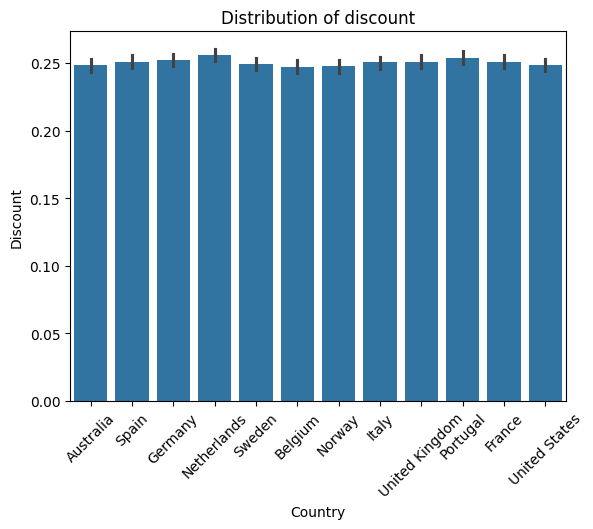

In [19]:
print(df.groupby('Country')['Discount'].sum().sort_values(ascending=False).head(1))
sns.barplot(x="Country",y="Discount",data=df)
plt.title("Distribution of discount")
plt.xlabel("Country")
plt.ylabel("Discount")
plt.xticks(rotation=45)
plt.show()

4.Which country had more sales on electronics?

In [ ]:
electronic_orders=df[df['Category']=='Electronics']
country_order_count=electronic_orders.groupby('Country').size()
# Sort the counts in descending order
sorted_country_order_counts = country_order_count.sort_values(ascending=False)
#Get the country with the most orders
top_country = sorted_country_order_counts.idxmax()
top_country_count = sorted_country_order_counts.max()
print(f"The country with the most orders for electronics is {top_country} with {top_country_count} orders.")

The country with the most orders for electronics is France with 803 orders.


5.How many people did sales through online?

In [ ]:
a=df.groupby('SalesChannel').size()
print("people who did online sales:")
size_of_a=a['Online']
print(size_of_a)

people who did online sales:
22520


6.which is the most used payment method?

In [ ]:
print(df.groupby('PaymentMethod').size().head(1))

PaymentMethod
Bank Transfer    15086
dtype: int64


7.What is the annual shipping cost per year?

Year
2020    138786.91
2021    138746.91
2022    137588.05
2023    136729.91
2024    138498.23
2025     93012.37
Name: ShippingCost, dtype: float64


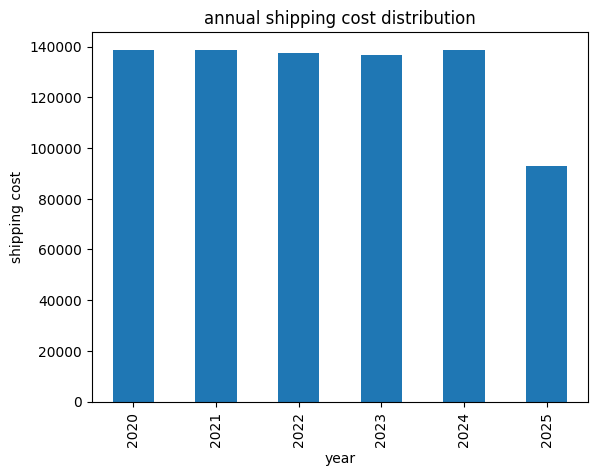

In [ ]:
df['Year']=df['InvoiceDate'].dt.year
print(df.groupby('Year')['ShippingCost'].sum())
s1=df.groupby('Year')['ShippingCost'].sum()
s1.plot(kind='bar',title='annual shipping cost distribution')
plt.xlabel('year')
plt.ylabel('shipping cost')
plt.show()

8.which is the least bought product?

In [ ]:
group_by=df.groupby('Description')['Quantity'].size()
print(group_by.sort_values())

Description
Wireless Mouse    3975
Notebook          4015
Blue Pen          4036
T-shirt           4050
Headphones        4058
Office Chair      4065
White Mug         4091
Desk Lamp         4103
Backpack          4122
USB Cable         4130
Wall Clock        4159
Name: Quantity, dtype: int64


9.Which product had more sales?

In [ ]:
group_by=df.groupby('Description')['Quantity'].size()
print(group_by.sort_values(ascending=False))

Description
Wall Clock        4159
USB Cable         4130
Backpack          4122
Desk Lamp         4103
White Mug         4091
Office Chair      4065
Headphones        4058
T-shirt           4050
Blue Pen          4036
Notebook          4015
Wireless Mouse    3975
Name: Quantity, dtype: int64


10.Which country bought more electronic items?

In [ ]:
electronics_data = df[df["Category"] == "Electronics"]
country_counts = electronics_data.groupby("Country")["Quantity"].sum()
print(country_counts)
top_country = country_counts.idxmax()
top_quantity = country_counts.max()
print(f"The country that bought the most electronic products is {top_country} with {top_quantity} items.")


Country
Australia         17545
Belgium           18949
France            19360
Germany           17974
Italy             18098
Netherlands       17764
Norway            18474
Portugal          19127
Spain             18400
Sweden            17560
United Kingdom    18581
United States     19464
Name: Quantity, dtype: int64
The country that bought the most electronic products is United States with 19464 items.


11.Which products are more frequently returned?

In [ ]:
# filter product
returned_products=df[df['ReturnStatus']=='Returned']
# Count the frequency of returned products
returned_frequency = returned_products['Description'].value_counts()
print("Products that are more frequently returned:")
print(returned_frequency)

Products that are more frequently returned:
Description
Notebook          421
Wall Clock        419
USB Cable         417
Blue Pen          404
T-shirt           403
Backpack          400
Desk Lamp         392
Wireless Mouse    388
White Mug         385
Headphones        381
Office Chair      377
Name: count, dtype: Int64


12.How many orders were shipped using FedEx?

In [ ]:
print(df['ShipmentProvider'].value_counts().head(1))

ShipmentProvider
FedEx    11296
Name: count, dtype: Int64


13.Which country placed the most orders?

In [ ]:
a=df.groupby('Country').size()
# Sort the counts in descending order
sorted_country_order_counts =a.sort_values(ascending=False)

# Get the country with the most orders
top_country = sorted_country_order_counts.idxmax()
top_country_count = sorted_country_order_counts.max()

print(f"The country with the most orders is {top_country} with {top_country_count} orders.")

The country with the most orders is France with 3820 orders.


14.What is the average shipping cost?

In [ ]:
average=df['ShippingCost'].mean()
print("avaerage shipping cost is:",average)

avaerage shipping cost is: 17.484206320864207


15.What percentage of customers have invalid CustomerIDs?

In [ ]:
print("invalid ids:")
null_count=df['CustomerID'].isnull().sum()
print(null_count)
total_rows=len(df)
print(total_rows)
percentage=(null_count/total_rows)*100
print("percentage of invalid ids:",percentage)


invalid ids:
0
44804
percentage of invalid ids: 0.0


16.Which year had more shipping cost

In [ ]:
df['Year']=df['InvoiceDate'].dt.year
print(df.groupby('Year')['ShippingCost'].sum().sort_values(ascending=False).head(1))

Year
2020    138786.91
Name: ShippingCost, dtype: float64


## SUMMERY

* The dataset consists of 18 columns and 49,782 rows, representing sales transactions.The primary objective of the analysis is to uncover insights into sales trends, customer behavior, and operational efficiency.
* Netherlands is the country which got more discount on sales
* Most used Payment method by customers is Bank Transfer.
* Bank transfer is used by 16417 people.
* France is the country which placed more orders on electronics with 885 orders.
* 25051 People did Online sales.
* In 2020 Shipping cost was high compared to other years.
* Average shipping cost is 17.49.
* France placed more orders.
* 12501 people used FedEx as shipment provider.
* The products which are mostly returned are :- wall clock,notebook,usb cable,blue pen,etc
* Wall clock is most bought product by customers.
* Wireless mouse is least bought product among customers.
